<a href="https://colab.research.google.com/github/A8stern/PyAD_mobile_2025/blob/main/lab_3_kovalev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3

**Выполнил: Ковалев Глеб К3341 367291**


In [1]:
import pandas as pd

In [2]:
pays_data = pd.read_csv('pays.csv')
inn_info_public = pd.read_csv('inn_info_public.csv')

### Задание 1

Выведите размерность (количество строк и столбцов) и первые 3 строки для каждой таблицы.

In [3]:

print("pays shape:", pays_data.shape)
print("inn_info_public shape:", inn_info_public.shape)

print("\npays head:")
print(pays_data.head(3))

print("\ninn_info_public head:")
print(inn_info_public.head(3))

pays shape: (2500476, 5)
inn_info_public shape: (240069, 4)

pays head:
   hash_inn_kt  hash_inn_dt  week  count      sum
0            0          0.0   1.0    4.0  38399.6
1            0          0.0   5.0    2.0    399.6
2            0          0.0   7.0    2.0     79.6

inn_info_public head:
   hash_inn  okved2  region  is_public
0     61058      34      86       True
1      8311      18      86       True
2    130273      -1      86      False


### Задание 2
Посчитайте количество пропусков в каждой таблице по столбцам.

In [4]:

cols_pays = ['hash_inn_kt', 'hash_inn_dt', 'week', 'count', 'sum']
cols_inn = ['hash_inn', 'okved2', 'region', 'is_public']

missing_pays_selected = pays_data[cols_pays].isna().sum()
missing_inn_selected = inn_info_public[cols_inn].isna().sum()

print("Пропуски в выбранных столбцах pays.csv:")
print(missing_pays_selected)

print("\nПропуски в выбранных столбцах inn_info_public.csv:")
print(missing_inn_selected)

Пропуски в выбранных столбцах pays.csv:
hash_inn_kt      0
hash_inn_dt      1
week             1
count            1
sum            514
dtype: int64

Пропуски в выбранных столбцах inn_info_public.csv:
hash_inn     0
okved2       0
region       0
is_public    0
dtype: int64


### Задание 3
Определите количество уникальных компаний в таблице **pays** (как отправителей, так и получателей).

In [19]:
unique_total = pd.concat([pays_data['hash_inn_kt'], pays_data['hash_inn_dt']]).nunique()

print("Уникальных компаний среди отправителей (hash_inn_kt):", pays_data['hash_inn_kt'].nunique())
print("Уникальных компаний среди получателей (hash_inn_dt):", pays_data['hash_inn_dt'].nunique())
print("Общее количество уникальных компаний:", unique_total)

Уникальных компаний среди отправителей (hash_inn_kt): 67063
Уникальных компаний среди получателей (hash_inn_dt): 134269
Общее количество уникальных компаний: 164855


### Задание 4

Найдите сумму и среднее количество платежей по неделям.

In [6]:
weekly_stats = pays_data.groupby('week').agg(
    avg_payments=('count', 'mean'),
    total_sum=('sum', 'sum')
)

print(weekly_stats)

      avg_payments     total_sum
week                            
0.0       3.179159  1.709492e+05
1.0       2.962299  4.948426e+07
2.0       2.909331  4.580054e+07
3.0       2.904220  4.171575e+07
4.0       2.866474  4.166325e+07
5.0       2.903411  4.314730e+07
6.0       2.969821  3.997779e+07
7.0       2.723362  2.826460e+07
8.0       2.972403  5.303573e+07
9.0       2.820261  3.425540e+07
10.0      2.973335  4.681740e+07
11.0      2.967501  4.405423e+07
12.0      2.973737  5.784220e+07
13.0      2.903983  3.899106e+07
14.0      2.957227  4.356347e+07
15.0      2.984937  4.389342e+07
16.0      2.998180  4.901707e+07
17.0      2.858249  3.784658e+07
18.0      2.768127  3.248673e+07
19.0      3.021213  4.735659e+07
20.0      3.021992  4.571625e+07
21.0      2.996109  4.791805e+07
22.0      2.950605  4.053427e+07
23.0      2.000000  7.600000e+00


### Задание 5

Определите 5 компаний (по `hash_inn_kt`), которые отправили наибольшую сумму платежей за весь период.

In [7]:
top_companies = (
    pays_data.groupby('hash_inn_kt')['sum']
        .sum()
        .sort_values(ascending=False)
        .head(5)
)

print(top_companies)

hash_inn_kt
81966     3.340752e+07
85582     1.882592e+07
47570     1.458800e+07
105607    1.214769e+07
79881     1.002770e+07
Name: sum, dtype: float64


### Задание 6

По данным таблицы **inn_info_public** исследуйте распределение ОКВЭДов (подсчитайте для каждого типа ОКВЭДа сколько компаний из таблицы к нему относятся). Визуализируйте распределение *(поможет метод `hist`)*.

okved2
-1     78654
 12    44918
 34    13654
 14    10179
 4      7617
       ...  
 2        90
 36       84
 13       68
 73       64
 1        50
Name: count, Length: 81, dtype: int64


<Axes: >

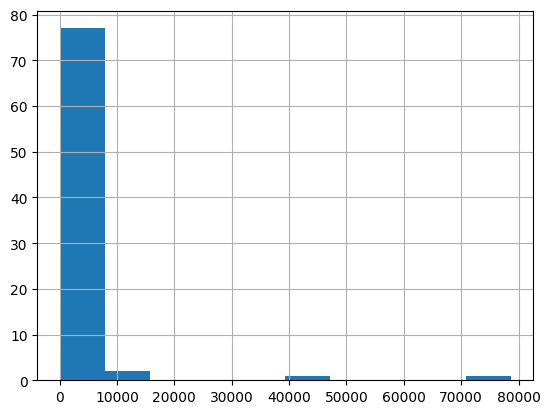

In [8]:
okved_counts = inn_info_public['okved2'].value_counts()
print(okved_counts)
okved_counts.hist()

### Задание 7

Добавьте в таблицу Pays информацию об ОКВЭДе и регионе отправителя (`hash_inn_kt`) и получателя (`hash_inn_dt`).

*Подсказка: здесь нужно поработать с двумя таблицами одновременно*

In [9]:
inn_small = inn_info_public[['hash_inn', 'okved2', 'region']]

pays_data = pays_data.merge(
    inn_small,
    left_on='hash_inn_kt',
    right_on='hash_inn',
    how='left',
    suffixes=('', '_sender')
)

pays_data = pays_data.rename(columns={
    'okved2': 'okved_sender',
    'region': 'region_sender'
})

pays_data = pays_data.drop(columns=['hash_inn'])

pays_data.head()

,hash_inn_kt,hash_inn_dt,week,count,sum,okved_sender,region_sender
0,0,0.0,1.0,4.0,38399.6,-1,84
1,0,0.0,5.0,2.0,399.6,-1,84
2,0,0.0,7.0,2.0,79.6,-1,84
3,0,0.0,9.0,2.0,239.6,-1,84
4,0,0.0,12.0,2.0,79.6,-1,84


In [10]:
pays_data = pays_data.merge(
    inn_small,
    left_on='hash_inn_dt',
    right_on='hash_inn',
    how='left',
    suffixes=('', '_receiver')
)

pays_data = pays_data.rename(columns={
    'okved2': 'okved_receiver',
    'region': 'region_receiver'
})

pays_data = pays_data.drop(columns=['hash_inn'])

pays_data.head()

,hash_inn_kt,hash_inn_dt,week,count,sum,okved_sender,region_sender,okved_receiver,region_receiver
0,0,0.0,1.0,4.0,38399.6,-1,84,-1.0,84.0
1,0,0.0,5.0,2.0,399.6,-1,84,-1.0,84.0
2,0,0.0,7.0,2.0,79.6,-1,84,-1.0,84.0
3,0,0.0,9.0,2.0,239.6,-1,84,-1.0,84.0
4,0,0.0,12.0,2.0,79.6,-1,84,-1.0,84.0


У нас okved_reciever и region_reciever стал float, тк для каких-то значений у нас нет четкого соответствия -> у нас будет NaN в столбцах, след-но нельзя сделать столбец int

In [11]:
print("NaN в okved_receiver:", pays_data['okved_receiver'].isna().sum())
print("NaN в region_receiver:", pays_data['region_receiver'].isna().sum())

NaN в okved_receiver: 1
NaN в region_receiver: 1


In [12]:
missing = pays_data[pays_data['okved_receiver'].isna()][['hash_inn_dt']].head()
print(missing)

         hash_inn_dt
2500475          NaN


In [13]:
print(inn_info_public[inn_info_public['hash_inn'] == 87315])

Empty DataFrame
Columns: [hash_inn, okved2, region, is_public]
Index: []


Мы нашли компанию, которой нет в таблице inn_info_public

### Задание 8


Используя результат, полученный в предыдущем задании, создайте таблицу, в которой для каждой отрасли (ОКВЭДа) указана сумма платежей, отправленных компаниями из этой отрасли.

In [21]:
okved_payment_stats = (
    pays_data
    .groupby('okved_sender')['sum']
    .sum()
    .reset_index()
    .sort_values(by='okved_sender', ascending=True)
)

print(okved_payment_stats)

    okved_sender           sum
0             -1  3.385470e+08
1              0  5.813516e+05
2              1  3.153304e+04
3              2  1.372089e+07
4              3  1.664367e+05
..           ...           ...
76            75  1.059206e+06
77            76  7.913187e+06
78            77  3.073128e+05
79            78  4.393721e+06
80            79  6.934375e+05

[81 rows x 2 columns]


### Задание 9
Определите, какую долю от общего объема составляют платежи, где отправитель и получатель находятся в разных регионах.

In [15]:
total_sum = pays_data['sum'].sum()

different_regions_sum = pays_data[
    pays_data['region_sender'] != pays_data['region_receiver']
]['sum'].sum()

share = different_regions_sum / total_sum

print("Доля платежей между разными регионами:", share)

Доля платежей между разными регионами: 0.3546202304376764


### Задание 10
Определите среднюю сумму платежей для публичных (`is_public == 1`) и непубличных компаний (`is_public == 0`).

In [18]:
inn_small = inn_info_public[['hash_inn', 'is_public']]

pays_with_public = pays_data.merge(
    inn_small,
    left_on='hash_inn_kt',
    right_on='hash_inn',
    how='left'
)

avg_payment_by_public = (
    pays_with_public
    .groupby('is_public')['sum']
    .mean()
)

print("Средняя сумма платежей:")
print(avg_payment_by_public)

Средняя сумма платежей:
is_public
False    429.842534
True     359.157951
Name: sum, dtype: float64
